## Problem Statement: 

PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them.

## Objective: 
The objective is to build fraud detection & prevention predictive model in the first step. If successful, in the 2nd step we will have to present your solutions and explain how it works to the client. The data has been made available to you.

## About Datasets: 
To give more edge to the solution they have collected data regarding 
- location [geo_scores] of the transactions
- their own proprietary index [Lambda_wts], 
- on network turn around times [Qset_tats] and
- vulnerability qualification score [instance_scores]. 

The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population

Training data contains masked variables pertaining to each transaction id . The prediction target here is'Target'.
- 1: Fraudulent transactions 
- 0: Clean transactions

# Approch Followed

## Missing Values: 
There is around 5% of missing data in geo score and around 7.24% of missing data in qsets_normalized_tat. After plotting box plot it is noted there are outliers so followed median imputation for both the variables.

## Checking for Duplicate data: 
The data showed around 
-	55349 duplicate entries in Geo Score (location),
-	33600 duplicate entries in Instance (cibil score)
-	59311 duplicate entries in QSET (Transaction time)
But if we check the total IDs in data shape it shows around 1424035 ids however if we check how many unique Ids are there we note around 284807 unique ids are there which means multiple transactions are done by people at similar locations and same transaction time leading to duplicate time location and customer cibil score data and so the data shows it as duplicates. These entries were not considered as duplicates and so were  untouched.
Encoding:  if we check the data type all the data is float and only group variable is object so encoding not required in this case
 	
## Merging Train and Test data:  
If we add the train ID and test ID it gives 284807 which is total id for geo and instance data. But there can be entries  available in training data which may also be in test data. So will merge both the tables to check unique ids in overall then we can merge else there will be duplicate data. After merging the data and finding the unique IDs it shows the 284807  entries for all data, Geo, Instance and Qset and similarly 1400 unique group in lambdawts and all_data_group.

## Concatenation: 
If we check the shape of original data it is 1424035, and unique Id counts is 284807. So direct merging will not be possible. So we will perform GroupBy on Geo(entire data) which will group id of same customer and avg the location(latitude and longitude details provided). Similary approach followed for instance(cibil score). 
The lambdwats contain data 1400  group which is similar to all data group so we  merge it in one table

## Outlier Treatment: 
Normalised_FNT shows unusual increase as so holding capping method right now as positive outlier range is -203.94 which is very less and very data is above this range.

## Feature Scaling: 
we used StandardScaler to normalize the data  as there is an outliers. Normalisation uses min-max of data for computation and with outlier it may give incorrect results.

## Imbalance Dataset: 
We have imbalance dataset with fraud transactions of around 0.17% and valid transactions of 99.83%. So as this is critical dataset and important part of model building we used both approaches to build the model:
-	1) balance the data and perform model building (using SMOTE technique)
-	2 ) model building without balancing data(using Anomaly detection - Isolation Forest model and Local Outlier Factor specially designed algo for these kind of data)

## Model Building:
-	Logistic Regression – 
-	Decision Tree
-	Random forest
-	XGBClassifier
-	GaussianNB
-	GradientBoosting Classifier
-	Stacking Classifier
- Out of all the models Gradient Boosting is  performing better with accuracy of 98%  and recall score of 99 on valid transaction and 97 on fraud transaction. Even the F1 score is 98 % for both the classes. 

Test_Data********
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     56824
         1.0       0.99      0.97      0.98     56902

        accuracy                           0.98    113726
        macro avg       0.98      0.98      0.98    113726
        weighted avg       0.98      0.98      0.98    113726


## Stacking Classifier: 
As it is financial fraud data  so becomes critical I have used stacking classifier it gave us  below accuracy:
- Accuracy : 1.00 (+/-0.00)[DTree]
- Accuracy : 1.00 (+/-0.00)[RF]
- Accuracy : 1.00 (+/-0.00)[XGBooost]
- - Accuracy : 0.90 (+/-0.00)[NaiveBayes]
- Accuracy : 0.98 (+/-0.00)[GradientBoostingClassifier]
- Accuracy : 1.00 (+/-0.00)[StackingClassifer]

stacking classifier is kind of ensemble learning technique where the predictions of multiple classifiers(base classifier) is used to train new feature known as meta classifiers

## Anomaly Detection: 
-Used anomaly detection model without balancing the data	

- IsolationForest:188445
- Accuracy Score : 0.8284886655401699

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91    227451
         1.0       0.01      0.91      0.02       394

           accuracy                           0.83    227845
           macro avg       0.50      0.87      0.46    227845
        weighted avg       1.00      0.83      0.90    227845

- Local_Outler_Factor:188445
- Accuracy Score :0.8268823103425574

              precision    recall  f1-score   support
             

         0.0       1.00      0.83      0.91    227451
         1.0       0.00      0.44      0.01       394

        accuracy                           0.83    227845
       macro avg       0.50      0.64      0.46    227845
        weighted avg       1.00      0.83      0.90    227845


-In anomaly detection isolation forest is performing better the recall score is 91% in case of fraud cases. Recall is when the model has correctly classified fraud as fraud and genuine as genuine transactions. It is the proportion of actual positives correctly classified

# Import Libraries

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()
sns.set()
import warnings
warnings.filterwarnings('ignore')

#Display all the columns of dataframe

pd.pandas.set_option("display.max_columns", None)

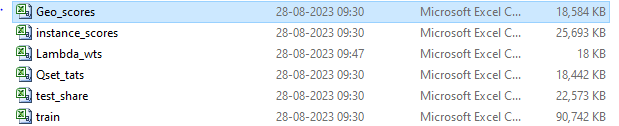

In [45]:
geo=pd.read_csv("geo_scores.csv")
instance = pd.read_csv("instance_scores.csv")
lambdawts = pd.read_csv("Lambda_wts.csv")
qset = pd.read_csv("Qset_tats.csv")
test = pd.read_csv("test_share.csv")
train = pd.read_csv("train.csv")

In [46]:
print(geo.shape)
print("******************"*5)
print(instance.shape)
print("******************"*5)
print(lambdawts.shape)
print("******************"*5)
print(qset.shape)
print("******************"*5)
print(test.shape)
print("******************"*5)
print(train.shape)


(1424035, 2)
******************************************************************************************
(1424035, 2)
******************************************************************************************
(1400, 2)
******************************************************************************************
(1424035, 2)
******************************************************************************************
(56962, 27)
******************************************************************************************
(227845, 28)


In [47]:
print("**********Geo********")
print(geo.head())
print("******* Instance***********")
print(instance.head())
print("********lambdawts**********")
print(lambdawts.head())
print("********qset**********")
print(qset.head())
print("********test**********")
print(test.head())
print("***********train*******")
print(train.head())


**********Geo********
       id  geo_score
0   26674       4.48
1  204314       4.48
2  176521       5.17
3   48812      -2.41
4  126870       6.55
******* Instance***********
       id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44
3  191161             0.76
4   34521            -0.84
********lambdawts**********
     Group  lambda_wt
0   Grp936       3.41
1   Grp347      -2.88
2   Grp188       0.39
3  Grp1053      -2.75
4    Grp56      -0.83
********qset**********
       id  qsets_normalized_tat
0    9983                  2.41
1  266000                  3.10
2   77525                  1.03
3  160765                -11.63
4  138220                 -4.48
********test**********
       id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  146574  Grp229 -0.300000  1.540000  0.220000 -0.280000  0.570000  0.260000   
1  268759  Grp141  0.633333  0.953333  0.810000  0.466667  0.910000  0.253333   
2   59727  Grp188  1.

In [48]:
print("********geo_id**********")
print(geo["id"].nunique())
print("*********Instance_Id*********")
print(instance["id"].nunique())
print("********Lambdawts_group**********")
print(lambdawts["Group"].nunique())
print("********QSET_ID**********")
print(qset["id"].nunique())
print("********test_id**********")
print(test["id"].nunique())
print("*******test[group]*****")
print(test["Group"].nunique())
print("********train_id**********")
print(train["id"].nunique())
print("********Train_group*******")
print(train["Group"].nunique())


********geo_id**********
284807
*********Instance_Id*********
284807
********Lambdawts_group**********
1400
********QSET_ID**********
284807
********test_id**********
56962
*******test[group]*****
915
********train_id**********
227845
********Train_group*******
1301


Observation on ID and Group:
    
Id is primary key in all the data sets so will use it to merge the data except lambdawts

group id in lambdawts is is test group and train group so will merge lambawts table with train and test

shape:

From shape of the data we can see the shape of train data and test data is not equal. so will have to explore further how appending on the id would be possible

similarly the shape of data in lambdawts is not equal so will have to explore if further to merge these datasets

# Checking for Basic info/ missingdata

In [49]:
print("******* Geo***********")
print(geo.info())
print("*********Instance*********")
print(instance.info())
print("**********lambdawts********")
print(lambdawts.info())
print("*******Qset***********")
print(qset.info())
print("********test**********")
print(test.info())
print("*********train*********")
print(train.info())

******* Geo***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
*********Instance*********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None
**********lambdawts********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 


# Observations:

- missing data in geo score
- missing data in qsets_normalized_tat  

In [50]:
# Checking missing data
print("*******Geo*************")
print(geo.isnull().sum())
print("*******Instance***********")
print(instance.isnull().sum())
print("********Lambdawts**********")
print(lambdawts.isnull().sum())
print("******Qset**********")
print(qset.isnull().sum())
print("********test**********")
print(test.isnull().sum())
print("*********train*********")
print(train.isnull().sum())

*******Geo*************
id               0
geo_score    71543
dtype: int64
*******Instance***********
id                 0
instance_scores    0
dtype: int64
********Lambdawts**********
Group        0
lambda_wt    0
dtype: int64
******Qset**********
id                           0
qsets_normalized_tat    103201
dtype: int64
********test**********
id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64
*********train*********
id                0
Group             0
Per1              0
Per2            

# Finding out Missing Value in geo and Qset

In [51]:
geo.isnull().sum()/len(geo)*100

id           0.000000
geo_score    5.023964
dtype: float64

In [52]:
qset.isnull().sum()/len(qset)*100

id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64

Observation: 
- missing data in geo score around 5%
- missing data in qsets_normalized_tat around 7.24%

In [53]:
# WE will impute the missing values as less than 25% is missing data
# secondly geo has 2 columns if we drop only one colum

In [54]:
geo.describe()

id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01

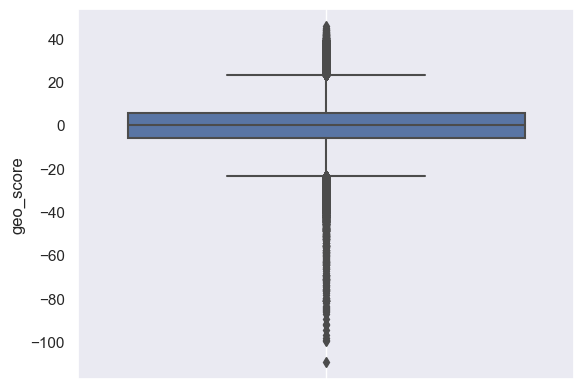

In [55]:
sns.boxplot(y="geo_score", data = geo)
plt.grid();

In [56]:
geo["geo_score"] = geo["geo_score"].fillna(geo["geo_score"]).median

In [57]:
geo["geo_score"].isnull().sum()

0

In [58]:
qset.describe()

id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01

<AxesSubplot:ylabel='qsets_normalized_tat'>

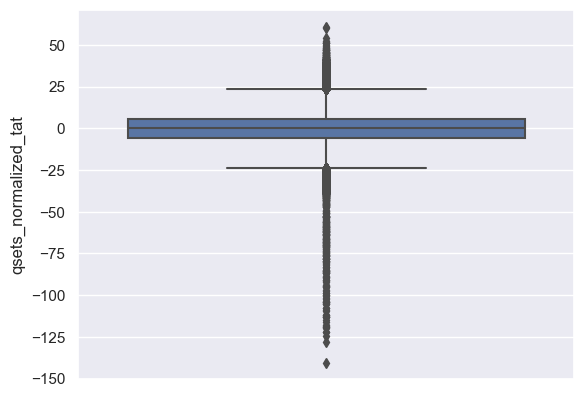

In [59]:
# Box plot

sns.boxplot(y = "qsets_normalized_tat", data= qset)

In [60]:
qset["qsets_normalized_tat"] = qset["qsets_normalized_tat"].fillna(qset["qsets_normalized_tat"]).median

In [61]:
qset["qsets_normalized_tat"].isnull().sum()

0

# Check Duplicates 

In [62]:
print("***********GEO_DUPLICATES******************")
print(geo.duplicated().sum())
print("********INSTANCE_DUPLICATES**********")
print(instance.duplicated().sum())
print("********LAMBDAWTS DUPLICATES **********")
print(lambdawts.duplicated().sum())
print("********QSET DUPLICATES**********")
print(qset.duplicated().sum())
print("********TEST DUPLICATES**********")
print(test.duplicated().sum())
print("*******TRAIN_DUPLICATES***********")
print(train.duplicated().sum())

***********GEO_DUPLICATES******************
1139228
********INSTANCE_DUPLICATES**********
33600
********LAMBDAWTS DUPLICATES **********
0
********QSET DUPLICATES**********
1139228
********TEST DUPLICATES**********
0
*******TRAIN_DUPLICATES***********
0


- we will not remove as mulitple transiction done by one customer

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              227845 non-null  int64  
 1   Group           227845 non-null  object 
 2   Per1            227845 non-null  float64
 3   Per2            227845 non-null  float64
 4   Per3            227845 non-null  float64
 5   Per4            227845 non-null  float64
 6   Per5            227845 non-null  float64
 7   Per6            227845 non-null  float64
 8   Per7            227845 non-null  float64
 9   Per8            227845 non-null  float64
 10  Per9            227845 non-null  float64
 11  Dem1            227845 non-null  float64
 12  Dem2            227845 non-null  float64
 13  Dem3            227845 non-null  float64
 14  Dem4            227845 non-null  float64
 15  Dem5            227845 non-null  float64
 16  Dem6            227845 non-null  float64
 17  Dem7      

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56962 entries, 0 to 56961
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              56962 non-null  int64  
 1   Group           56962 non-null  object 
 2   Per1            56962 non-null  float64
 3   Per2            56962 non-null  float64
 4   Per3            56962 non-null  float64
 5   Per4            56962 non-null  float64
 6   Per5            56962 non-null  float64
 7   Per6            56962 non-null  float64
 8   Per7            56962 non-null  float64
 9   Per8            56962 non-null  float64
 10  Per9            56962 non-null  float64
 11  Dem1            56962 non-null  float64
 12  Dem2            56962 non-null  float64
 13  Dem3            56962 non-null  float64
 14  Dem4            56962 non-null  float64
 15  Dem5            56962 non-null  float64
 16  Dem6            56962 non-null  float64
 17  Dem7            56962 non-null 

# Encoding is not required for group

In [65]:
# Checking missing data

print("geo id:",geo["id"].nunique())
print("******************"*5)
print("instance id",instance["id"].nunique())
print("******************"*5)
print("lambdawts group",lambdawts["Group"].nunique())
print("******************"*5)
print("qset id",qset["id"].nunique())
print("******************"*5)
print("testid",test["id"].nunique())
print("Test Group",test["Group"].nunique())
print("******************"*5)
print("Train ID",train["id"].nunique())
print("Train Group",train["Group"].nunique())

geo id: 284807
******************************************************************************************
instance id 284807
******************************************************************************************
lambdawts group 1400
******************************************************************************************
qset id 284807
******************************************************************************************
testid 56962
Test Group 915
******************************************************************************************
Train ID 227845
Train Group 1301


In [66]:
56962 + 227845

284807

Observation:
    
if we add the train ID and test ID it gives 284807 which is total id for geo and instance data. But there can be entries  available in training data which may also be in test data. So will merge both the tables to check unique ids in overall then we can merge else there will be duplicate data

In [67]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target'],
      dtype='object')

In [68]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT'],
      dtype='object')

# If we merge and check if there are repetative data as one person must have done multiple transactions
- We will check how many unique id we have in trin and test and then merge with geo and instance

# Assigninng additional column to train and test datas

In [69]:
train["data"]= "train"
test['data']= "test"


In [70]:
train.head()

id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   
3   50806  Grp198  0.636667  1.090000  0.750000  0.940000  0.743333  0.346667   
4  184244  Grp228  0.560000  1.013333  0.593333  0.416667  0.773333  0.460000   

       Per7      Per8      Per9      Dem1      Dem2      Dem3      Dem4  \
0  0.340000  1.010000  0.863333  0.460000  0.643333  0.736667  0.756667   
1  0.810000  0.783333  0.190000  0.470000  0.613333  0.883333  0.653333   
2  0.056667  0.756667  0.226667  0.660000  0.730000  0.873333  0.923333   
3  0.956667  0.633333  0.486667  1.096667  0.466667  0.670000  0.526667   
4  0.853333  0.796667  0.516667  0.756667  0.683333  0.296667  0.780000   

       Dem5      Dem6      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.813333  0.693333  0.666667  0.680000  0.726667  0.606667  1.010000   
1  0.463333  0.483333  0.583333  0.716667  0.743333  0.680000  0.690000   
2  1.223333  0.686667  0.606667  0.690000  0.820000  0.600000  0.383333   
3  0.783333  0.856667  0.716667  0.720000  0.900000  0.680000  0.846667   
4  0.636667  0.783333  0.630000  0.603333  0.486667  0.693333  0.526667   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  Target   data  
0  0.933333  0.603333  0.686667  0.673333       -245.7500       0  train  
1  0.560000  0.670000  0.553333  0.653333       -248.0000       0  train  
2  0.763333  0.670000  0.686667  0.673333       -233.1250       0  train  
3  0.423333  0.520000  0.846667  0.760000       -249.7775       0  train  
4  0.520000  0.716667  0.706667  0.673333       -247.5775       0  train

In [71]:
test.head()

id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  146574  Grp229 -0.300000  1.540000  0.220000 -0.280000  0.570000  0.260000   
1  268759  Grp141  0.633333  0.953333  0.810000  0.466667  0.910000  0.253333   
2   59727  Grp188  1.043333  0.740000  0.860000  1.006667  0.583333  0.616667   
3  151544  Grp426  1.283333  0.300000  0.576667  0.636667  0.256667  0.543333   
4  155008  Grp443  1.186667  0.326667  0.476667  0.866667  0.436667  0.680000   

       Per7      Per8      Per9      Dem1      Dem2      Dem3      Dem4  \
0  0.700000  1.076667  0.930000  0.156667  0.546667  0.530000  0.876667   
1  1.040000  0.550000  0.543333  0.433333  0.966667  0.760000  0.576667   
2  0.630000  0.686667  0.593333  1.250000  0.826667  0.826667  0.653333   
3  0.356667  0.663333  1.156667  1.186667  0.900000  0.433333  0.230000   
4  0.476667  0.686667  1.476667  1.213333  0.853333  0.583333  0.850000   

       Dem5      Dem6      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.450000  0.370000  0.786667  0.546667  0.313333  0.703333  0.813333   
1  0.653333  0.553333  0.636667  0.770000  0.993333  0.536667  0.703333   
2  0.663333  0.453333  0.626667  0.756667  0.953333  0.623333  0.753333   
3  1.323333  0.403333  0.480000  0.460000  0.260000  0.800000  0.606667   
4  1.090000  0.550000  0.706667  0.740000  0.823333  0.670000  0.896667   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  data  
0  0.776667  0.796667  0.823333  0.783333       -249.7500  test  
1  0.806667  0.630000  0.673333  0.673333       -249.8125  test  
2  0.870000  0.596667  0.680000  0.670000       -248.1200  test  
3  0.456667  0.320000  0.676667  0.660000       -222.9875  test  
4  0.566667  0.546667  0.650000  0.663333       -196.2200  test

# merging both the dataset
- As train has target variable and test is not haveing target feature then it will be added as nan in the merged dataset

In [72]:
print(train.shape)
print(test.shape)

(227845, 29)
(56962, 28)


In [73]:
all_data = pd.concat([train,test],axis=0)

In [74]:
all_data.head()

id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   
3   50806  Grp198  0.636667  1.090000  0.750000  0.940000  0.743333  0.346667   
4  184244  Grp228  0.560000  1.013333  0.593333  0.416667  0.773333  0.460000   

       Per7      Per8      Per9      Dem1      Dem2      Dem3      Dem4  \
0  0.340000  1.010000  0.863333  0.460000  0.643333  0.736667  0.756667   
1  0.810000  0.783333  0.190000  0.470000  0.613333  0.883333  0.653333   
2  0.056667  0.756667  0.226667  0.660000  0.730000  0.873333  0.923333   
3  0.956667  0.633333  0.486667  1.096667  0.466667  0.670000  0.526667   
4  0.853333  0.796667  0.516667  0.756667  0.683333  0.296667  0.780000   

       Dem5      Dem6      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.813333  0.693333  0.666667  0.680000  0.726667  0.606667  1.010000   
1  0.463333  0.483333  0.583333  0.716667  0.743333  0.680000  0.690000   
2  1.223333  0.686667  0.606667  0.690000  0.820000  0.600000  0.383333   
3  0.783333  0.856667  0.716667  0.720000  0.900000  0.680000  0.846667   
4  0.636667  0.783333  0.630000  0.603333  0.486667  0.693333  0.526667   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  Target   data  
0  0.933333  0.603333  0.686667  0.673333       -245.7500     0.0  train  
1  0.560000  0.670000  0.553333  0.653333       -248.0000     0.0  train  
2  0.763333  0.670000  0.686667  0.673333       -233.1250     0.0  train  
3  0.423333  0.520000  0.846667  0.760000       -249.7775     0.0  train  
4  0.520000  0.716667  0.706667  0.673333       -247.5775     0.0  train

In [75]:
all_data.tail()

id   Group      Per1      Per2      Per3      Per4      Per5  \
56957   18333  Grp102  0.553333  1.043333  1.096667  0.686667  0.673333   
56958  244207  Grp504  1.353333  0.616667  0.276667  0.783333  0.690000   
56959  103277   Grp78  1.083333  0.433333  0.806667  0.490000  0.243333   
56960  273294  Grp134  0.566667  1.153333  0.370000  0.616667  0.793333   
56961  223337   Grp18  1.426667  0.110000 -0.006667 -0.200000  0.983333   

           Per6      Per7      Per8      Per9      Dem1      Dem2      Dem3  \
56957  0.340000  0.900000  0.643333  0.543333  0.586667  0.660000  0.970000   
56958  0.650000  0.473333  0.670000  1.023333  0.293333  0.940000  0.896667   
56959  0.316667  0.533333  0.606667  0.420000  0.480000  0.490000  1.023333   
56960  0.226667  0.910000  0.696667  0.600000  0.500000  0.896667  0.876667   
56961  1.870000  0.033333  0.963333  0.266667  0.586667  0.793333  0.780000   

           Dem4      Dem5      Dem6      Dem7      Dem8      Dem9     Cred1  \
56957  0.796667  0.626667  0.636667  0.700000  0.576667  0.433333  0.660000   
56958  0.983333  0.936667  0.576667  0.643333  0.713333  0.870000  0.683333   
56959  0.310000  0.906667  0.450000  0.536667  0.433333  0.063333  0.753333   
56960  0.683333  0.850000  0.573333  0.643333  0.776667  1.026667  0.626667   
56961  0.493333  0.623333  0.553333  0.543333  0.616667  0.670000  0.770000   

          Cred2     Cred3     Cred4     Cred5     Cred6  Normalised_FNT  \
56957  0.776667  0.610000  0.690000  0.750000  0.700000       -249.5050   
56958  0.690000  0.640000  0.883333  0.663333  0.660000       -248.7525   
56959  0.780000  0.603333  0.880000  0.643333  0.676667       -231.0500   
56960  0.646667  0.566667  0.616667  0.713333  0.706667       -246.3150   
56961  0.893333  0.586667  0.616667  0.683333  0.650000       -248.4500   

       Target  data  
56957     NaN  test  
56958     NaN  test  
56959     NaN  test  
56960     NaN  test  
56961     NaN  test

In [76]:
all_data.shape


(284807, 29)

In [77]:
all_data.isnull().sum()

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64

In [78]:
print("geo:",geo["id"].nunique())
print("******************"*5)
print("instance",instance["id"].nunique())
print("******************"*5)
print("lambdawts",lambdawts["Group"].nunique())
print("******************"*5)
print("qset",qset["id"].nunique())
print("******************"*5)
print("all data id",all_data["id"].nunique())
print("************"*5)
print("all_data_group",all_data["Group"].nunique())

geo: 284807
******************************************************************************************
instance 284807
******************************************************************************************
lambdawts 1400
******************************************************************************************
qset 284807
******************************************************************************************
all data id 284807
************************************************************
all_data_group 1400


# Geo

In [79]:
all_data.shape

(284807, 29)

In [80]:
geo.shape

(1424035, 2)

In [81]:
lambdawts.head()

Group  lambda_wt
0   Grp936       3.41
1   Grp347      -2.88
2   Grp188       0.39
3  Grp1053      -2.75
4    Grp56      -0.83

In [82]:
# Groupby as if we look at the shape of all_data it is less than geo shape (it contains different trasictions of same customers too)
# groupby will group if of same customer and avg the transaction

In [83]:
geo=geo.groupby("id").mean()

In [84]:
geo.shape

(284807, 0)

In [85]:
# After groupby geo mataches with all data shape
# we will concat both the data

In [86]:
all_data=pd.merge(all_data, geo, on="id",how="left")

In [87]:
all_data.head()

id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   
3   50806  Grp198  0.636667  1.090000  0.750000  0.940000  0.743333  0.346667   
4  184244  Grp228  0.560000  1.013333  0.593333  0.416667  0.773333  0.460000   

       Per7      Per8      Per9      Dem1      Dem2      Dem3      Dem4  \
0  0.340000  1.010000  0.863333  0.460000  0.643333  0.736667  0.756667   
1  0.810000  0.783333  0.190000  0.470000  0.613333  0.883333  0.653333   
2  0.056667  0.756667  0.226667  0.660000  0.730000  0.873333  0.923333   
3  0.956667  0.633333  0.486667  1.096667  0.466667  0.670000  0.526667   
4  0.853333  0.796667  0.516667  0.756667  0.683333  0.296667  0.780000   

       Dem5      Dem6      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.813333  0.693333  0.666667  0.680000  0.726667  0.606667  1.010000   
1  0.463333  0.483333  0.583333  0.716667  0.743333  0.680000  0.690000   
2  1.223333  0.686667  0.606667  0.690000  0.820000  0.600000  0.383333   
3  0.783333  0.856667  0.716667  0.720000  0.900000  0.680000  0.846667   
4  0.636667  0.783333  0.630000  0.603333  0.486667  0.693333  0.526667   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  Target   data  
0  0.933333  0.603333  0.686667  0.673333       -245.7500     0.0  train  
1  0.560000  0.670000  0.553333  0.653333       -248.0000     0.0  train  
2  0.763333  0.670000  0.686667  0.673333       -233.1250     0.0  train  
3  0.423333  0.520000  0.846667  0.760000       -249.7775     0.0  train  
4  0.520000  0.716667  0.706667  0.673333       -247.5775     0.0  train

In [88]:
all_data.head()

id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   
3   50806  Grp198  0.636667  1.090000  0.750000  0.940000  0.743333  0.346667   
4  184244  Grp228  0.560000  1.013333  0.593333  0.416667  0.773333  0.460000   

       Per7      Per8      Per9      Dem1      Dem2      Dem3      Dem4  \
0  0.340000  1.010000  0.863333  0.460000  0.643333  0.736667  0.756667   
1  0.810000  0.783333  0.190000  0.470000  0.613333  0.883333  0.653333   
2  0.056667  0.756667  0.226667  0.660000  0.730000  0.873333  0.923333   
3  0.956667  0.633333  0.486667  1.096667  0.466667  0.670000  0.526667   
4  0.853333  0.796667  0.516667  0.756667  0.683333  0.296667  0.780000   

       Dem5      Dem6      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.813333  0.693333  0.666667  0.680000  0.726667  0.606667  1.010000   
1  0.463333  0.483333  0.583333  0.716667  0.743333  0.680000  0.690000   
2  1.223333  0.686667  0.606667  0.690000  0.820000  0.600000  0.383333   
3  0.783333  0.856667  0.716667  0.720000  0.900000  0.680000  0.846667   
4  0.636667  0.783333  0.630000  0.603333  0.486667  0.693333  0.526667   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  Target   data  
0  0.933333  0.603333  0.686667  0.673333       -245.7500     0.0  train  
1  0.560000  0.670000  0.553333  0.653333       -248.0000     0.0  train  
2  0.763333  0.670000  0.686667  0.673333       -233.1250     0.0  train  
3  0.423333  0.520000  0.846667  0.760000       -249.7775     0.0  train  
4  0.520000  0.716667  0.706667  0.673333       -247.5775     0.0  train

# instance

In [89]:
instance.shape

(1424035, 2)

In [90]:
instance["id"].nunique()

284807

In [91]:
all_data.shape

(284807, 29)

In [92]:
# We need to groupby instance as well as similar data

In [93]:
instance.head()

id  instance_scores
0  173444            -0.88
1  259378             1.50
2  161170             0.44
3  191161             0.76
4   34521            -0.84

In [94]:
instance=instance.groupby("id").mean()

In [95]:
instance.shape

(284807, 1)

In [96]:
all_data=pd.merge(all_data,instance,on="id",how="left")

In [97]:
all_data.shape

(284807, 30)

In [98]:
all_data.head()

id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   
3   50806  Grp198  0.636667  1.090000  0.750000  0.940000  0.743333  0.346667   
4  184244  Grp228  0.560000  1.013333  0.593333  0.416667  0.773333  0.460000   

       Per7      Per8      Per9      Dem1      Dem2      Dem3      Dem4  \
0  0.340000  1.010000  0.863333  0.460000  0.643333  0.736667  0.756667   
1  0.810000  0.783333  0.190000  0.470000  0.613333  0.883333  0.653333   
2  0.056667  0.756667  0.226667  0.660000  0.730000  0.873333  0.923333   
3  0.956667  0.633333  0.486667  1.096667  0.466667  0.670000  0.526667   
4  0.853333  0.796667  0.516667  0.756667  0.683333  0.296667  0.780000   

       Dem5      Dem6      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.813333  0.693333  0.666667  0.680000  0.726667  0.606667  1.010000   
1  0.463333  0.483333  0.583333  0.716667  0.743333  0.680000  0.690000   
2  1.223333  0.686667  0.606667  0.690000  0.820000  0.600000  0.383333   
3  0.783333  0.856667  0.716667  0.720000  0.900000  0.680000  0.846667   
4  0.636667  0.783333  0.630000  0.603333  0.486667  0.693333  0.526667   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  Target   data  \
0  0.933333  0.603333  0.686667  0.673333       -245.7500     0.0  train   
1  0.560000  0.670000  0.553333  0.653333       -248.0000     0.0  train   
2  0.763333  0.670000  0.686667  0.673333       -233.1250     0.0  train   
3  0.423333  0.520000  0.846667  0.760000       -249.7775     0.0  train   
4  0.520000  0.716667  0.706667  0.673333       -247.5775     0.0  train   

   instance_scores  
0            -0.06  
1             0.52  
2             1.56  
3             0.70  
4            -0.47

# lambdawts

In [99]:
lambdawts.shape

(1400, 2)

In [100]:
lambdawts["Group"].nunique()

1400

In [101]:
all_data.shape

(284807, 30)

In [102]:
all_data["Group"].nunique()

1400

In [103]:
# The lambdwats contain data of  group which is in all data group so we need to merge it in one table

In [104]:
all_data=pd.merge(all_data,lambdawts, on = "Group",how="left")

In [105]:
all_data.shape

(284807, 31)

In [106]:
all_data.head()

id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   
3   50806  Grp198  0.636667  1.090000  0.750000  0.940000  0.743333  0.346667   
4  184244  Grp228  0.560000  1.013333  0.593333  0.416667  0.773333  0.460000   

       Per7      Per8      Per9      Dem1      Dem2      Dem3      Dem4  \
0  0.340000  1.010000  0.863333  0.460000  0.643333  0.736667  0.756667   
1  0.810000  0.783333  0.190000  0.470000  0.613333  0.883333  0.653333   
2  0.056667  0.756667  0.226667  0.660000  0.730000  0.873333  0.923333   
3  0.956667  0.633333  0.486667  1.096667  0.466667  0.670000  0.526667   
4  0.853333  0.796667  0.516667  0.756667  0.683333  0.296667  0.780000   

       Dem5      Dem6      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.813333  0.693333  0.666667  0.680000  0.726667  0.606667  1.010000   
1  0.463333  0.483333  0.583333  0.716667  0.743333  0.680000  0.690000   
2  1.223333  0.686667  0.606667  0.690000  0.820000  0.600000  0.383333   
3  0.783333  0.856667  0.716667  0.720000  0.900000  0.680000  0.846667   
4  0.636667  0.783333  0.630000  0.603333  0.486667  0.693333  0.526667   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  Target   data  \
0  0.933333  0.603333  0.686667  0.673333       -245.7500     0.0  train   
1  0.560000  0.670000  0.553333  0.653333       -248.0000     0.0  train   
2  0.763333  0.670000  0.686667  0.673333       -233.1250     0.0  train   
3  0.423333  0.520000  0.846667  0.760000       -249.7775     0.0  train   
4  0.520000  0.716667  0.706667  0.673333       -247.5775     0.0  train   

   instance_scores  lambda_wt  
0            -0.06      -0.13  
1             0.52       0.66  
2             1.56      -0.51  
3             0.70       0.72  
4            -0.47       0.60

# QSET

In [107]:
qset["id"].nunique()

284807

In [108]:
qset.shape

(1424035, 2)

In [109]:
qset=qset.groupby("id").mean()

In [110]:
qset.shape

(284807, 0)

In [111]:
all_data=pd.merge(all_data, qset, on = "id",how="left")

In [112]:
all_data.head()

id   Group      Per1      Per2      Per3      Per4      Per5      Per6  \
0  112751  Grp169  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333   
1   18495  Grp161  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667   
2   23915  Grp261  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667   
3   50806  Grp198  0.636667  1.090000  0.750000  0.940000  0.743333  0.346667   
4  184244  Grp228  0.560000  1.013333  0.593333  0.416667  0.773333  0.460000   

       Per7      Per8      Per9      Dem1      Dem2      Dem3      Dem4  \
0  0.340000  1.010000  0.863333  0.460000  0.643333  0.736667  0.756667   
1  0.810000  0.783333  0.190000  0.470000  0.613333  0.883333  0.653333   
2  0.056667  0.756667  0.226667  0.660000  0.730000  0.873333  0.923333   
3  0.956667  0.633333  0.486667  1.096667  0.466667  0.670000  0.526667   
4  0.853333  0.796667  0.516667  0.756667  0.683333  0.296667  0.780000   

       Dem5      Dem6      Dem7      Dem8      Dem9     Cred1     Cred2  \
0  0.813333  0.693333  0.666667  0.680000  0.726667  0.606667  1.010000   
1  0.463333  0.483333  0.583333  0.716667  0.743333  0.680000  0.690000   
2  1.223333  0.686667  0.606667  0.690000  0.820000  0.600000  0.383333   
3  0.783333  0.856667  0.716667  0.720000  0.900000  0.680000  0.846667   
4  0.636667  0.783333  0.630000  0.603333  0.486667  0.693333  0.526667   

      Cred3     Cred4     Cred5     Cred6  Normalised_FNT  Target   data  \
0  0.933333  0.603333  0.686667  0.673333       -245.7500     0.0  train   
1  0.560000  0.670000  0.553333  0.653333       -248.0000     0.0  train   
2  0.763333  0.670000  0.686667  0.673333       -233.1250     0.0  train   
3  0.423333  0.520000  0.846667  0.760000       -249.7775     0.0  train   
4  0.520000  0.716667  0.706667  0.673333       -247.5775     0.0  train   

   instance_scores  lambda_wt  
0            -0.06      -0.13  
1             0.52       0.66  
2             1.56      -0.51  
3             0.70       0.72  
4            -0.47       0.60

In [113]:
all_data.shape

(284807, 31)

# Split the Train and test data 

In [114]:
train= all_data[all_data["data"]=="train"]
test = all_data[all_data["data"]=="test"]

In [115]:
print(train.shape)
print(test.shape)

(227845, 31)
(56962, 31)


# Target- Train dataset

In [116]:
# split the data into independent and dependent variable

In [117]:
x = train.drop(["id","Group","Target","data"], axis =1)
y = train[["Target"]]

In [118]:
x.head()

Per1      Per2      Per3      Per4      Per5      Per6      Per7  \
0  1.070000  0.580000  0.480000  0.766667  1.233333  1.993333  0.340000   
1  0.473333  1.206667  0.883333  1.430000  0.726667  0.626667  0.810000   
2  1.130000  0.143333  0.946667  0.123333  0.080000  0.836667  0.056667   
3  0.636667  1.090000  0.750000  0.940000  0.743333  0.346667  0.956667   
4  0.560000  1.013333  0.593333  0.416667  0.773333  0.460000  0.853333   

       Per8      Per9      Dem1      Dem2      Dem3      Dem4      Dem5  \
0  1.010000  0.863333  0.460000  0.643333  0.736667  0.756667  0.813333   
1  0.783333  0.190000  0.470000  0.613333  0.883333  0.653333  0.463333   
2  0.756667  0.226667  0.660000  0.730000  0.873333  0.923333  1.223333   
3  0.633333  0.486667  1.096667  0.466667  0.670000  0.526667  0.783333   
4  0.796667  0.516667  0.756667  0.683333  0.296667  0.780000  0.636667   

       Dem6      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
0  0.693333  0.666667  0.680000  0.726667  0.606667  1.010000  0.933333   
1  0.483333  0.583333  0.716667  0.743333  0.680000  0.690000  0.560000   
2  0.686667  0.606667  0.690000  0.820000  0.600000  0.383333  0.763333   
3  0.856667  0.716667  0.720000  0.900000  0.680000  0.846667  0.423333   
4  0.783333  0.630000  0.603333  0.486667  0.693333  0.526667  0.520000   

      Cred4     Cred5     Cred6  Normalised_FNT  instance_scores  lambda_wt  
0  0.603333  0.686667  0.673333       -245.7500            -0.06      -0.13  
1  0.670000  0.553333  0.653333       -248.0000             0.52       0.66  
2  0.670000  0.686667  0.673333       -233.1250             1.56      -0.51  
3  0.520000  0.846667  0.760000       -249.7775             0.70       0.72  
4  0.716667  0.706667  0.673333       -247.5775            -0.47       0.60

In [119]:
y.head()

Target
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0

# Test data

In [120]:

test.head()

id   Group      Per1      Per2      Per3      Per4      Per5  \
227845  146574  Grp229 -0.300000  1.540000  0.220000 -0.280000  0.570000   
227846  268759  Grp141  0.633333  0.953333  0.810000  0.466667  0.910000   
227847   59727  Grp188  1.043333  0.740000  0.860000  1.006667  0.583333   
227848  151544  Grp426  1.283333  0.300000  0.576667  0.636667  0.256667   
227849  155008  Grp443  1.186667  0.326667  0.476667  0.866667  0.436667   

            Per6      Per7      Per8      Per9      Dem1      Dem2      Dem3  \
227845  0.260000  0.700000  1.076667  0.930000  0.156667  0.546667  0.530000   
227846  0.253333  1.040000  0.550000  0.543333  0.433333  0.966667  0.760000   
227847  0.616667  0.630000  0.686667  0.593333  1.250000  0.826667  0.826667   
227848  0.543333  0.356667  0.663333  1.156667  1.186667  0.900000  0.433333   
227849  0.680000  0.476667  0.686667  1.476667  1.213333  0.853333  0.583333   

            Dem4      Dem5      Dem6      Dem7      Dem8      Dem9     Cred1  \
227845  0.876667  0.450000  0.370000  0.786667  0.546667  0.313333  0.703333   
227846  0.576667  0.653333  0.553333  0.636667  0.770000  0.993333  0.536667   
227847  0.653333  0.663333  0.453333  0.626667  0.756667  0.953333  0.623333   
227848  0.230000  1.323333  0.403333  0.480000  0.460000  0.260000  0.800000   
227849  0.850000  1.090000  0.550000  0.706667  0.740000  0.823333  0.670000   

           Cred2     Cred3     Cred4     Cred5     Cred6  Normalised_FNT  \
227845  0.813333  0.776667  0.796667  0.823333  0.783333       -249.7500   
227846  0.703333  0.806667  0.630000  0.673333  0.673333       -249.8125   
227847  0.753333  0.870000  0.596667  0.680000  0.670000       -248.1200   
227848  0.606667  0.456667  0.320000  0.676667  0.660000       -222.9875   
227849  0.896667  0.566667  0.546667  0.650000  0.663333       -196.2200   

        Target  data  instance_scores  lambda_wt  
227845     NaN  test            -0.04       0.76  
227846     NaN  test            -0.77       0.18  
227847     NaN  test             0.11       0.39  
227848     NaN  test             0.33       1.80  
227849     NaN  test            -0.37       1.89

In [121]:
test=test.drop(["id","Group","Target","data"], axis= 1)

In [122]:
test.head()

Per1      Per2      Per3      Per4      Per5      Per6      Per7  \
227845 -0.300000  1.540000  0.220000 -0.280000  0.570000  0.260000  0.700000   
227846  0.633333  0.953333  0.810000  0.466667  0.910000  0.253333  1.040000   
227847  1.043333  0.740000  0.860000  1.006667  0.583333  0.616667  0.630000   
227848  1.283333  0.300000  0.576667  0.636667  0.256667  0.543333  0.356667   
227849  1.186667  0.326667  0.476667  0.866667  0.436667  0.680000  0.476667   

            Per8      Per9      Dem1      Dem2      Dem3      Dem4      Dem5  \
227845  1.076667  0.930000  0.156667  0.546667  0.530000  0.876667  0.450000   
227846  0.550000  0.543333  0.433333  0.966667  0.760000  0.576667  0.653333   
227847  0.686667  0.593333  1.250000  0.826667  0.826667  0.653333  0.663333   
227848  0.663333  1.156667  1.186667  0.900000  0.433333  0.230000  1.323333   
227849  0.686667  1.476667  1.213333  0.853333  0.583333  0.850000  1.090000   

            Dem6      Dem7      Dem8      Dem9     Cred1     Cred2     Cred3  \
227845  0.370000  0.786667  0.546667  0.313333  0.703333  0.813333  0.776667   
227846  0.553333  0.636667  0.770000  0.993333  0.536667  0.703333  0.806667   
227847  0.453333  0.626667  0.756667  0.953333  0.623333  0.753333  0.870000   
227848  0.403333  0.480000  0.460000  0.260000  0.800000  0.606667  0.456667   
227849  0.550000  0.706667  0.740000  0.823333  0.670000  0.896667  0.566667   

           Cred4     Cred5     Cred6  Normalised_FNT  instance_scores  \
227845  0.796667  0.823333  0.783333       -249.7500            -0.04   
227846  0.630000  0.673333  0.673333       -249.8125            -0.77   
227847  0.596667  0.680000  0.670000       -248.1200             0.11   
227848  0.320000  0.676667  0.660000       -222.9875             0.33   
227849  0.546667  0.650000  0.663333       -196.2200            -0.37   

        lambda_wt  
227845       0.76  
227846       0.18  
227847       0.39  
227848       1.80  
227849       1.89

In [123]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 0 to 227844
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Per1             227845 non-null  float64
 1   Per2             227845 non-null  float64
 2   Per3             227845 non-null  float64
 3   Per4             227845 non-null  float64
 4   Per5             227845 non-null  float64
 5   Per6             227845 non-null  float64
 6   Per7             227845 non-null  float64
 7   Per8             227845 non-null  float64
 8   Per9             227845 non-null  float64
 9   Dem1             227845 non-null  float64
 10  Dem2             227845 non-null  float64
 11  Dem3             227845 non-null  float64
 12  Dem4             227845 non-null  float64
 13  Dem5             227845 non-null  float64
 14  Dem6             227845 non-null  float64
 15  Dem7             227845 non-null  float64
 16  Dem8             227845 non-null  floa

In [124]:
# Data Preprocssing

# 1) missing value imputation completed
# 2) Encoding - Not required as no char variable
# 3) Outlier treatment - 
# 4) Feature Scaling - Completed

In [125]:
x.describe()

Per1           Per2           Per3           Per4  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.666006       0.667701       0.666315       0.666687   
std         0.654133       0.548305       0.506357       0.471956   
min       -18.136667     -23.573333     -15.443333      -1.226667   
25%         0.360000       0.470000       0.370000       0.383333   
50%         0.670000       0.690000       0.726667       0.660000   
75%         1.103333       0.933333       1.010000       0.913333   
max         1.483333       8.020000       3.793333       6.163333   

                Per5           Per6           Per7           Per8  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.666723       0.667378       0.666934       0.666279   
std         0.461393       0.444573       0.415657       0.401546   
min       -37.246667      -8.053333     -13.853333     -23.740000   
25%         0.436667       0.410000       0.483333       0.596667   
50%         0.650000       0.576667       0.680000       0.673333   
75%         0.870000       0.800000       0.856667       0.776667   
max        12.266667      25.100000      40.863333       7.336667   

                Per9           Dem1           Dem2           Dem3  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.666688       0.666576       0.666329       0.666380   
std         0.366537       0.340436       0.332016       0.305384   
min        -3.810000      -0.893333      -1.263333      -0.833333   
25%         0.453333       0.413333       0.450000       0.473333   
50%         0.650000       0.656667       0.663333       0.683333   
75%         0.866667       0.913333       0.886667       0.883333   
max         5.863333       4.673333       3.043333       3.626667   

                Dem4           Dem5           Dem6           Dem7  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.666871       0.666518       0.666748       0.666394   
std         0.292013       0.279469       0.271590       0.257631   
min        -3.853333      -2.500000      -0.976667     -17.500000   
25%         0.510000       0.500000       0.513333       0.596667   
50%         0.690000       0.666667       0.666667       0.646667   
75%         0.840000       0.833333       0.820000       0.710000   
max         6.440000       2.080000       2.530000       9.413333   

                Dem8           Dem9          Cred1          Cred2  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.666540       0.666535       0.666684       0.666264   
std         0.244423       0.241902       0.207575       0.202204   
min       -10.943333      -2.296667     -14.270000      -0.280000   
25%         0.590000       0.486667       0.613333       0.546667   
50%         0.656667       0.670000       0.663333       0.680000   
75%         0.730000       0.843333       0.716667       0.813333   
max         9.733333       4.166667       8.176667       2.193333   

               Cred3          Cred4          Cred5          Cred6  \
count  227845.000000  227845.000000  227845.000000  227845.000000   
mean        0.666755       0.666878       0.666566       0.666776   
std         0.174204       0.160803       0.135762       0.111612   
min        -2.766667      -0.080000      -6.856667      -4.476667   
25%         0.560000       0.556667       0.643333       0.650000   
50%         0.673333       0.650000       0.666667       0.670000   
75%         0.783333       0.746667       0.696667       0.693333   
max         3.173333       1.840000      11.203333      11.950000   

       Normalised_FNT  instance_scores      lambda_wt  
count   227845.000000    227845.000000  227845.000000  
mean      -227.954170        -0.000123       0.000350  
std         61.951661         1.091488       0.957957  
min       -250.000000       -24.590000     -19.210000  
25% 

<AxesSubplot:ylabel='Normalised_FNT'>

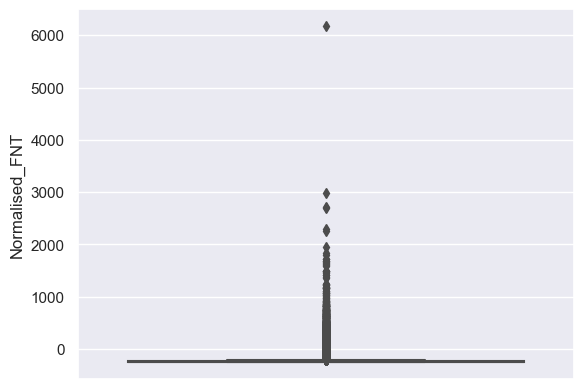

In [126]:
sns.boxplot(y ="Normalised_FNT",data=x )

In [127]:
x["Normalised_FNT"].describe()

count    227845.000000
mean       -227.954170
std          61.951661
min        -250.000000
25%        -248.617500
50%        -244.510000
75%        -230.750000
max        6172.790000
Name: Normalised_FNT, dtype: float64

In [128]:
IQR = (-230.750000)-(-248.617500)
IQR

17.867500000000007

In [129]:
# Pos_outlier range = Q3+1.5*IQR

pos_outlier_range = (-230.750000)+1.5*IQR
pos_outlier_range

-203.94875

In [130]:
# holding capping method right now as positive outlier range is -203.94 which is very less and very data is above this range

# Feature Scaling

In [131]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_x = sc.fit_transform(x)

In [132]:
pd.DataFrame(sc_x).describe()

0             1             2             3             4   \
count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
mean   1.152050e-16 -1.250406e-16  1.700401e-16  3.456137e-16 -5.339956e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -2.874447e+01 -4.421098e+01 -3.181486e+01 -4.011726e+00 -8.217170e+01   
25%   -4.678047e-01 -3.605683e-01 -5.851915e-01 -6.003821e-01 -4.986139e-01   
50%    6.105872e-03  4.066939e-02  1.191877e-01 -1.416771e-02 -3.624526e-02   
75%    6.685615e-01  4.844626e-01  6.787413e-01  5.226069e-01  4.405724e-01   
max    1.249484e+00  1.340918e+01  6.175532e+00  1.164655e+01  2.514117e+01   

                 5             6             7             8             9   \
count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
mean  -2.049625e-16  4.497342e-17  2.235651e-16 -2.084790e-16  1.052233e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.961595e+01 -3.493340e+01 -6.078089e+01 -1.221350e+01 -4.582104e+00   
25%   -5.789326e-01 -4.417124e-01 -1.733613e-01 -5.820826e-01 -7.438795e-01   
50%   -2.040406e-01  3.143566e-02  1.756780e-02 -4.552782e-02 -2.910820e-02   
75%    2.983147e-01  4.564670e-01  2.749070e-01  5.455918e-01  7.248287e-01   
max    5.495757e+01  9.670601e+01  1.661179e+01  1.417772e+01  1.176951e+01   

                 10            11            12            13            14  \
count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
mean  -6.239858e-16 -5.673138e-16  6.097083e-16  6.815360e-16 -1.662786e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -5.811971e+00 -4.910923e+00 -1.547951e+01 -1.133049e+01 -6.051100e+00   
25%   -6.515639e-01 -6.321454e-01 -5.372076e-01 -5.958371e-01 -5.648776e-01   
50%   -9.022932e-03  5.551521e-02  7.920522e-02  5.325959e-04 -2.998801e-04   
75%    6.636372e-01  7.104301e-01  5.928826e-01  5.969023e-01  5.642778e-01   
max    7.159325e+00  9.693679e+00  1.977017e+01  5.057748e+00  6.860546e+00   

                 15            16            17            18            19  \
count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
mean   2.788928e-16  1.267819e-16  3.604791e-16  5.568583e-16  5.790760e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -7.051329e+01 -4.749922e+01 -1.224960e+01 -7.195806e+01 -4.679759e+00   
25%   -2.706473e-01 -3.131479e-01 -7.435576e-01 -2.570189e-01 -5.914703e-01   
50%   -7.657107e-02 -4.039599e-02  1.432557e-02 -1.614191e-02  6.793120e-02   
75%    1.692588e-01  2.596311e-01  7.308697e-01  2.407935e-01  7.273327e-01   
max    3.395145e+01  3.709477e+01  1.446923e+01  3.617963e+01  7.552138e+00   

                 20            21            22            23            24  \
count  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05  2.278450e+05   
mean  -2.863878e-16 -2.442739e-16  9.009133e-17  1.037059e-15 -4.415118e-16   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.970929e+01 -4.644689e+00 -5.541489e+01 -4.608324e+01 -3.558561e-01   
25%   -6.128164e-01 -6.853842e-01 -1.711252e-01 -1.503079e-01 -3.335403e-01   
50%    3.776502e-02 -1.049626e-01  7.443046e-04  2.888425e-02 -2.672385e-01   
75%    6.692117e-01  4.961884e-01  2.217194e-01  2.379418e-01 -4.512932e-02   
max    1.438883e+01  7.295413e+00  7.761210e+01  1.010933e+02  1.033186e+02   

                 25            26  
count  2.278450e+05  2.278450e+05  
mean   4.162867e-17 -4.822611e-17  
std    1.000002e+00  1.000002e+00  
min   -2.252882e+01 -2.005350e+01  
25%   -4.946259e-01 -4.492380e-01  
50%   -8.234372e-02  5.182947e-02  
75%    4.123949e-01  5.111413e-01  
max    2.175945e+01  1.099180e+01

# Checking Imbalance Dataset

In [133]:
y.value_counts()

Target
0.0       227451
1.0          394
dtype: int64

In [134]:
fraud_per = 394/(394+227451)*100
fraud_per



0.17292457591783889

In [135]:
fraud=train[train['Target']==1]
valid = train[train['Target']==0]
outlier_total = len(fraud)/float(len(train))*100
print("Total outlier :",outlier_total) 

Total outlier : 0.17292457591783889


In [136]:
print(len(fraud))
print(len(valid))

394
227451


In [137]:
# This type of issue is called Anomaly detection - Isolation Forest model and Local Outlier Factor will be used

In [138]:
# Since data is imbalance, so we can build model with both approch
#1) balance the data and perform model building
#2 ) model building without balancing data

In [139]:
from imblearn.over_sampling import SMOTE

ros = SMOTE()
x_ros,y_ros=ros.fit_resample(sc_x,y)
print(y.value_counts())
print(y_ros.value_counts())

Target
0.0       227451
1.0          394
dtype: int64
Target
0.0       227451
1.0       227451
dtype: int64


In [142]:
# Split the data into train and test split for model buildig

from sklearn.model_selection import train_test_split

In [143]:
x_train,x_test,y_train,y_test=train_test_split(x_ros,y_ros,test_size=0.25,random_state=101)

In [144]:
from sklearn. linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression()

In [145]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [146]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [147]:
print("***********Train*********")
print(confusion_matrix(y_train,y_pred_train))
print("***********Test*********")
print(confusion_matrix(y_test,y_pred_test))

***********Train*********
[[165868   4759]
 [ 16692 153857]]
***********Test*********
[[55220  1604]
 [ 5685 51217]]


In [148]:
print(classification_report(y_train,y_pred_train))
print("********Test_Data********")
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94    170627
         1.0       0.97      0.90      0.93    170549

    accuracy                           0.94    341176
   macro avg       0.94      0.94      0.94    341176
weighted avg       0.94      0.94      0.94    341176

********Test_Data********
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     56824
         1.0       0.97      0.90      0.93     56902

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726



In [149]:
print(accuracy_score(y_train,y_pred_train))
print
print(accuracy_score(y_test,y_pred_test))

0.9371262925879897
0.9359073562773684


# Decission Tree

In [159]:
from sklearn.tree import DecisionTreeClassifier

dtree= DecisionTreeClassifier()
dtree.fit(x_train,y_train)
y_pred_DT = dtree.predict(x_train)
y_pred_test_DT = dtree.predict(x_test)
print(accuracy_score(y_train,y_pred_DT))
print()
print(accuracy_score(y_test,y_pred_test_DT))

1.0

0.9980655259131597


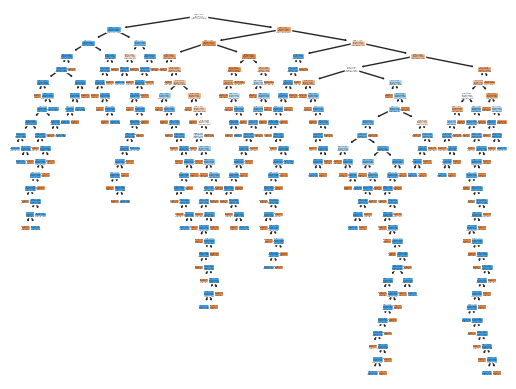

In [115]:
# from sklearn import tree
# tree.plot_tree(dtree,filled = True)
# plt.show()

# Random Forest Classification

In [157]:
from sklearn.ensemble import RandomForestClassifier 

In [158]:
rf = RandomForestClassifier(n_estimators=100,criterion="gini")
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)
print(accuracy_score(y_train,y_pred_rf))
print()
print(accuracy_score(y_test,y_pred_test_rf))

1.0

0.9998593109755025


In [150]:
# from sklearn.ensemble import GradientBoostingClassifier
# gbc = GradientBoostingClassifier()
# gbc.fit(x_train,y_train)
# y_pred_gb = gbc.predict(x_train)
# y_pred_test_gb = gbc.predict(x_test)
# print(accuracy_score(y_train,y_pred_gb))
# print()
# print(accuracy_score(y_test,y_pred_test_gb))

0.9797318685956808

0.9790900937340625


In [154]:
print("***********Train*********")
print(confusion_matrix(y_train,y_pred_gb))
print("***********Test*********")
print(confusion_matrix(y_test,y_pred_test_gb))

***********Train*********
[[168187   2440]
 [  4475 166074]]
***********Test*********
[[56022   802]
 [ 1576 55326]]


In [155]:
print(classification_report(y_train,y_pred_gb))
print("********Test_Data********")
print(classification_report(y_test,y_pred_test_gb))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    170627
         1.0       0.99      0.97      0.98    170549

    accuracy                           0.98    341176
   macro avg       0.98      0.98      0.98    341176
weighted avg       0.98      0.98      0.98    341176

********Test_Data********
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     56824
         1.0       0.99      0.97      0.98     56902

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [120]:
# XG boost- Boosting is for undersampling  problem but in this case just trying

In [151]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [152]:
y_pred_xgb = xgb.predict(x_train)
y_pred_test_xgb = xgb.predict(x_test)
print(accuracy_score(y_train,y_pred_xgb))
print()
print(accuracy_score(y_test,y_pred_test_xgb))

1.0

0.999718621951005


# Stacking Classifier

In [124]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 6.2 MB/s eta 0:00:00


In [153]:
from mlxtend.classifier import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [162]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(criterion='entropy')
clf3 = RandomForestClassifier(n_estimators=100,criterion='entropy')
clf4=XGBClassifier()
clf5=GaussianNB()
clf6= GradientBoostingClassifier()
sclf=StackingClassifier(classifiers=[clf2,clf3,clf4,clf5,clf6], meta_classifier = clf1)
print("5 fold CV:\n")
for clf,label in zip([clf2,clf3,clf4,clf5,clf6,sclf],["DTree","RF","XGBooost","NaiveBayes","GradientBoostingClassifier","StackingClassifer"]):
    scores = cross_val_score(clf,x_train,y_train,cv=5,scoring="accuracy")
    print("Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean(),scores.std(),label))

5 fold CV:

Accuracy : 1.00 (+/-0.00)[DTree]
Accuracy : 1.00 (+/-0.00)[RF]
Accuracy : 1.00 (+/-0.00)[XGBooost]
Accuracy : 0.90 (+/-0.00)[NaiveBayes]
Accuracy : 0.98 (+/-0.00)[GradientBoostingClassifier]
Accuracy : 1.00 (+/-0.00)[StackingClassifer]


# Anomaly detection Model

In [152]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(sc_x,y,test_size=0.25,random_state=101,stratify=y)

In [153]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [154]:
IsolationForest()

IsolationForest()

In [155]:
classification={"IsolationForest":IsolationForest(contamination=outlier_total),
               "Local_Outler_Factor":LocalOutlierFactor(contamination=outlier_total),
               "OneClassSVM": OneClassSVM()}

In [156]:
n_outlier=len(fraud)
n_outlier

394

In [ ]:
for i,(clf_name,clf)in enumerate(classification.items()):
    if clf_name == "Local_Outler_Factor":
        y_pred = clf.fit_predict(x)
        score_predition=clf.negative_outlier_factor_
        
    elif clf_name == "OneClassSVM":
        clf.fit(x)
        y_pred=clf.predict(x)
    else:
        clf.fit(x)
        score_prediction=clf.decision_function(x)
        y_pred=clf.predict(x)
        
    y_pred[y_pred == 1]=0
    y_pred[y_pred == -1]=1
    n_error =(y_pred != 1).sum()
    print("{}:{}".format(clf_name,n_error))
    print("Accuracy Score :")
    print(accuracy_score(y,y_pred))
    print()
    print(classification_report(y,y_pred))
        

IsolationForest:188445
Accuracy Score :
0.8284886655401699

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91    227451
         1.0       0.01      0.91      0.02       394

    accuracy                           0.83    227845
   macro avg       0.50      0.87      0.46    227845
weighted avg       1.00      0.83      0.90    227845

Local_Outler_Factor:188445
Accuracy Score :
0.8268823103425574

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91    227451
         1.0       0.00      0.44      0.01       394

    accuracy                           0.83    227845
   macro avg       0.50      0.64      0.46    227845
weighted avg       1.00      0.83      0.90    227845



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *

In [ ]:
model = Sequential()
model.add(Dense(128,activation= "relu", input_dim=29))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "adam",loss="binarry_crossentropy",metrics=["accuracy"])
model.fit(x,y,epochs=20,batch_size=32,validation_split=0.25)
